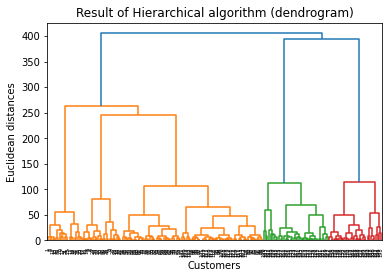

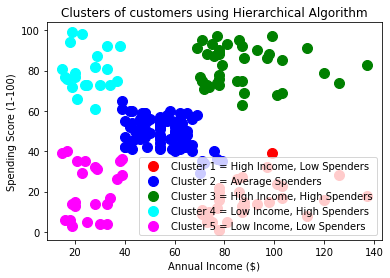

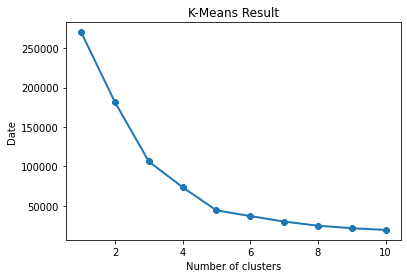

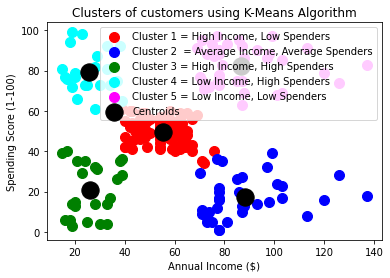

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

class Parser :
    def __int__(self) :
        pass

    def parse_method(self) :
        try :
            # load the csv
            data = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")  

            # creating the feature matrix - X
            # taking all the rows of the third and fourth columns (to match the segmentation)
            annual_income_and_spending = data.iloc[:,[3, 4]].values  
            data_list = []

            self.using_hierarchical_algorithm(annual_income_and_spending)
            self.using_kmeans_algorithm(data_list, annual_income_and_spending)
            
        except Exception as exception :
            print(f"Filed to run the implementation due to: {exception}\n")

    @staticmethod
    def using_hierarchical_algorithm(annual_income_and_spending) :
        # creating a Dendrogram to identify optimal number of clusters
        # and using Ward method to minimize variance within the clusters
        shc.dendrogram(shc.linkage(annual_income_and_spending, method='ward'))

        # plotting the Dendrogram
        plt.title('Result of Hierarchical algorithm (dendrogram)')
        plt.xlabel('Customers')
        plt.ylabel('Euclidean distances')
        plt.show()

        # fitting Hierarchical Clustering the identified clusters to data
        hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
        y_hc = hc.fit_predict(annual_income_and_spending)

        # training the hierarchical Clustering model on the dataset  and visualising the Cluster
        plt.scatter(annual_income_and_spending[y_hc == 0, 0], annual_income_and_spending[y_hc == 0, 1], s=100, 
                    c='red', label='Cluster 1 = High Income, Low Spenders')  

        plt.scatter(annual_income_and_spending[y_hc == 1, 0], annual_income_and_spending[y_hc == 1, 1], s=100, 
                    c='blue', label='Cluster 2 = Average Spenders ')  

        plt.scatter(annual_income_and_spending[y_hc == 2, 0], annual_income_and_spending[y_hc == 2, 1], s=100, 
                    c='green', label='Cluster 3 = High Income, High Spenders')  

        plt.scatter(annual_income_and_spending[y_hc == 3, 0], annual_income_and_spending[y_hc == 3, 1], s=100,
                    c='cyan',label='Cluster 4 = Low Income, High Spenders')  

        plt.scatter(annual_income_and_spending[y_hc == 4, 0], annual_income_and_spending[y_hc == 4, 1], s=100,
                    c='magenta', label='Cluster 5 = Low Income, Low Spenders')  

        # plotting the visualization
        plt.title('Clusters of customers using Hierarchical Algorithm')
        plt.xlabel('Annual Income ($)')
        plt.ylabel('Spending Score (1-100)')

        plt.legend()
        plt.show()
        
    @staticmethod
    def using_kmeans_algorithm(data_list, annual_income_and_spending) :

        # use the Elbow method to find the corresponding number of K clusters
        for i in range(1, 11) :
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
            kmeans.fit(annual_income_and_spending)
            data_list.append(kmeans.inertia_)

        # plotting the result
        plt.plot(range(1, 11), data_list, marker="8", linewidth=2)
        plt.title('K-Means Result')
        plt.xlabel('Number of clusters')
        plt.ylabel('Date')
        plt.show()

        # fitting K-Means to the dataset
        # after plotting we found that the elbow point is at 5 clusters
        kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)  

        # gives for each data point in X a corresponding label to which cluster it corresponds
        y_kmeans = kmeans.fit_predict(
            annual_income_and_spending)  

        # visualising the Cluster
        plt.scatter(annual_income_and_spending[y_kmeans == 0, 0], annual_income_and_spending[y_kmeans == 0, 1], s=100,
                    c='red', label='Cluster 1 = High Income, Low Spenders')  

        plt.scatter(annual_income_and_spending[y_kmeans == 1, 0], annual_income_and_spending[y_kmeans == 1, 1], s=100,
                    c='blue', label='Cluster 2  = Average Income, Average Spenders')  

        plt.scatter(annual_income_and_spending[y_kmeans == 2, 0], annual_income_and_spending[y_kmeans == 2, 1], s=100,
                    c='green', label='Cluster 3 = High Income, High Spenders')  

        plt.scatter(annual_income_and_spending[y_kmeans == 3, 0], annual_income_and_spending[y_kmeans == 3, 1], s=100,
                    c='cyan', label='Cluster 4 = Low Income, High Spenders')  

        plt.scatter(annual_income_and_spending[y_kmeans == 4, 0], annual_income_and_spending[y_kmeans == 4, 1], s=100,
                    c='magenta', label='Cluster 5 = Low Income, Low Spenders')  

        # there is no change in their values because the clustering has been successful
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black',
                    label='Centroids')  

        # plotting the visualization
        plt.title('Clusters of customers using K-Means Algorithm')
        plt.xlabel('Annual Income ($)')
        plt.ylabel('Spending Score (1-100)')
        plt.legend()
        plt.show()
        
if __name__ == '__main__' :
    myObject = Parser()
    myObject.parse_method()
